<a href="https://colab.research.google.com/github/ij1810/test_app/blob/master/Project_CKD_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import OneHotEncoder

In [ ]:
user_health_data=pd.read_csv('kidney_disease.csv')
user_health_data = user_health_data.sample(frac=1)
user_health_data.reset_index(drop=True, inplace=True)

In [ ]:
#Sanity Checking
data_shape=user_health_data.shape
data_columns=user_health_data.columns

target_distribution= user_health_data['classification'].value_counts()

In [ ]:
data_shape

(400, 26)

In [ ]:
data_columns

Index(['id', 'age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'bgr',
       'bu', 'sc', 'sod', 'pot', 'hemo', 'pcv', 'wc', 'rc', 'htn', 'dm', 'cad',
       'appet', 'pe', 'ane', 'classification'],
      dtype='object')

In [ ]:
target_distribution

ckd       248
notckd    150
ckd\t       2
Name: classification, dtype: int64

In [ ]:
user_health_data.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,92,71.0,70.0,1.010,3.0,0.0,normal,abnormal,present,present,...,33,5600,3.6,yes,yes,yes,good,no,no,ckd
1,280,47.0,80.0,NaN,NaN,NaN,NaN,NaN,notpresent,notpresent,...,52,8100,5.2,no,no,no,good,no,no,notckd
2,399,58.0,80.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,...,53,6800,6.1,no,no,no,good,no,no,notckd
3,144,60.0,90.0,1.010,2.0,0.0,abnormal,normal,notpresent,notpresent,...,33,10500,4.1,no,no,no,good,no,no,ckd
4,69,26.0,70.0,1.015,0.0,4.0,NaN,normal,notpresent,notpresent,...,52,6900,6,no,yes,no,good,no,no,ckd


In [ ]:
##There seems to be an issue with pcv wc and rc columns
user_health_data.dtypes

id                  int64
age               float64
bp                float64
sg                float64
al                float64
su                float64
rbc                object
pc                 object
pcc                object
ba                 object
bgr               float64
bu                float64
sc                float64
sod               float64
pot               float64
hemo              float64
pcv                object
wc                 object
rc                 object
htn                object
dm                 object
cad                object
appet              object
pe                 object
ane                object
classification     object
dtype: object

In [ ]:
#Data has missing values
(user_health_data.isnull().sum()/user_health_data.shape[0])*100

id                 0.00
age                2.25
bp                 3.00
sg                11.75
al                11.50
su                12.25
rbc               38.00
pc                16.25
pcc                1.00
ba                 1.00
bgr               11.00
bu                 4.75
sc                 4.25
sod               21.75
pot               22.00
hemo              13.00
pcv               17.50
wc                26.25
rc                32.50
htn                0.50
dm                 0.50
cad                0.50
appet              0.25
pe                 0.25
ane                0.25
classification     0.00
dtype: float64

IndexError: list index out of range

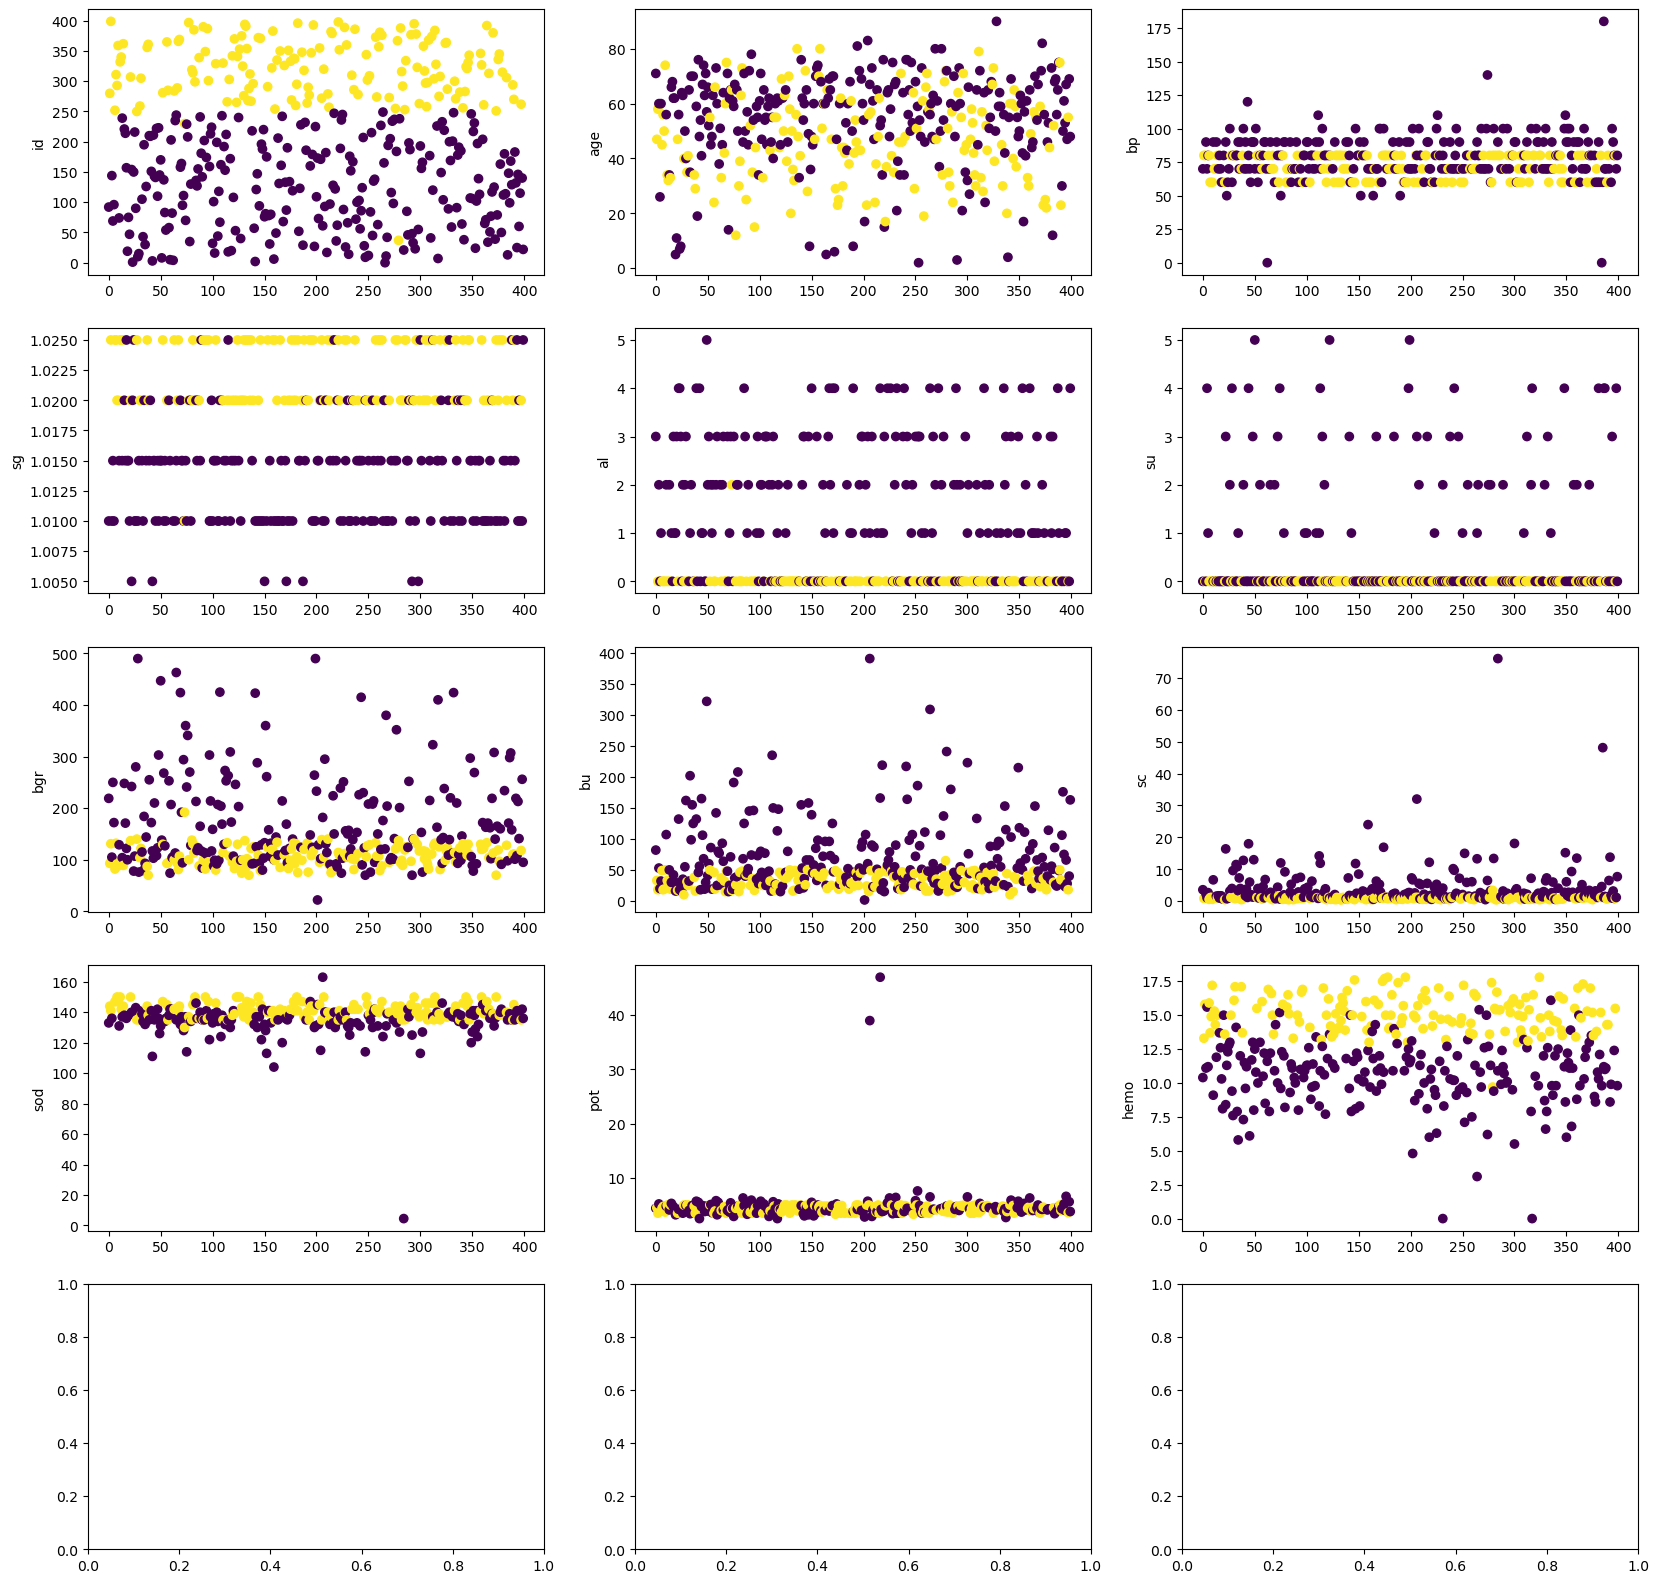

In [ ]:
#Checking for outliers

#### Visualizing numeric columns ######

numeric_cols = user_health_data.select_dtypes(include = np.number) ### selects numeric columns

column_names = list(numeric_cols.columns)

col_index = 0

plot_rows = 5
plot_cols = 3

fig, ax = plt.subplots(nrows = plot_rows,ncols=plot_cols,figsize = (20,20))

for row_count in range(plot_rows):
    for col_count in range(plot_cols):
        ax[row_count][col_count].scatter(y = numeric_cols[column_names[col_index]],x=numeric_cols.index, c= [0 if x == 'ckd' else 1 for x in user_health_data['classification']])
        ax[row_count][col_count].set_ylabel(column_names[col_index])
        col_index = col_index + 1



### INSIGHTS ###
#id column can be dropped
#There are persons with bp and hemo 0. consider them as missing value
#sg is looking more like a categorical column as it is taking on anly 5 values. we can do one hot encoding
#al and su both looks like sg


In [ ]:
#Analyze the categorical columns
##dm,cad and classification column needs preprocessing


In [ ]:
categorical_data= user_health_data.select_dtypes(include = 'object')
categorical_columns = list(categorical_data.columns)

for col_name in categorical_columns:
    print('***********')
    print(col_name)
    print(categorical_data[col_name].value_counts())

In [ ]:
#Analyze the relationship between features and targets
sns.boxplot(x=user_health_data.loc[user_health_data['pot']<30, 'classification'], y= user_health_data.loc[user_health_data['pot']<30, 'pot'])

In [ ]:
###PREPROCESSING
##Resolve the issues that are converting numeric columns into object type
#wheh there are string value in any one of thr entry
#Indentify the non numeric values in the column--> Treatment

In [ ]:
def identify_non_numeric(series_):
    non_numeric_elem=[]
    for elem in series_:
        try:
            float(elem)
        except:
            non_numeric_elem.append(elem)
    return non_numeric_elem


In [ ]:
cols_to_analyze = ['pcv','wc','rc']
for col in cols_to_analyze:
    non_numeric_elems= identify_non_numeric(user_health_data[col])
    print('*********')
    print(col)
    print(non_numeric_elems)

In [ ]:
for col in cols_to_analyze:
    user_health_data[col] = pd.to_numeric(user_health_data[col], errors='coerce')

In [ ]:
user_health_data.dtypes

In [ ]:
user_health_data['dm'].value_counts()

no       258
yes      134
\tno       3
\tyes      2
 yes       1
Name: dm, dtype: int64

In [ ]:
user_health_data.loc[user_health_data['dm']=='\tno', 'dm'] = 'no'
user_health_data.loc[user_health_data['dm']=='\tyes', 'dm'] = 'yes'
user_health_data.loc[user_health_data['dm']==' yes', 'dm'] = 'yes'

In [ ]:
user_health_data['cad'].value_counts()

no      362
yes      34
\tno      2
Name: cad, dtype: int64

In [ ]:
user_health_data['cad'].value_counts()
user_health_data.loc[user_health_data['cad']=='\tno','cad'] ='no'

In [ ]:
user_health_data['classification'].value_counts()
user_health_data.loc[user_health_data['classification'] == 'ckd\t', 'classification']= 'ckd'

In [ ]:
user_health_data.drop(['id'], axis=1, inplace=True)

In [ ]:
user_health_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             391 non-null    float64
 1   bp              388 non-null    float64
 2   sg              353 non-null    float64
 3   al              354 non-null    float64
 4   su              351 non-null    float64
 5   rbc             248 non-null    object 
 6   pc              335 non-null    object 
 7   pcc             396 non-null    object 
 8   ba              396 non-null    object 
 9   bgr             356 non-null    float64
 10  bu              381 non-null    float64
 11  sc              383 non-null    float64
 12  sod             313 non-null    float64
 13  pot             312 non-null    float64
 14  hemo            348 non-null    float64
 15  pcv             330 non-null    object 
 16  wc              295 non-null    object 
 17  rc              270 non-null    obj

In [ ]:
user_health_data.loc[user_health_data['bp']<25, 'bp']= np.nan

user_health_data.loc[user_health_data['hemo']<1, 'hemo']=np.nan

In [ ]:
##Missing value imputation

In [ ]:
#column wise
(user_health_data.isnull().sum()/user_health_data.shape[0])*100

age                2.25
bp                 3.50
sg                11.75
al                11.50
su                12.25
rbc               38.00
pc                16.25
pcc                1.00
ba                 1.00
bgr               11.00
bu                 4.75
sc                 4.25
sod               21.75
pot               22.00
hemo              13.50
pcv               17.50
wc                26.25
rc                32.50
htn                0.50
dm                 0.50
cad                0.50
appet              0.25
pe                 0.25
ane                0.25
classification     0.00
dtype: float64

In [ ]:
##Missing value percentage row wise

In [ ]:
rowwise_missing= (user_health_data.isnull().sum(axis=1)/user_health_data.shape[1])*100

In [ ]:
rowwise_missing.describe()

count    400.0000
mean      10.1300
std       11.6998
min        0.0000
25%        0.0000
50%        4.0000
75%       16.0000
max       44.0000
dtype: float64

In [ ]:
#ANALYSIS OF COLUMNS

user_health_data['age'].describe()

count    391.000000
mean      51.483376
std       17.169714
min        2.000000
25%       42.000000
50%       55.000000
75%       64.500000
max       90.000000
Name: age, dtype: float64

In [ ]:
user_health_data['age'].isnull().sum()

9

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='age', ylabel='Density'>

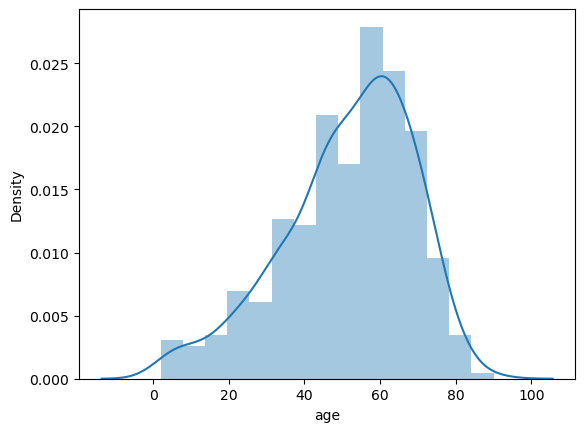

In [ ]:
sns.distplot(user_health_data['age'])

In [ ]:
user_health_data.loc[user_health_data['age'].isnull(), 'age']= 55

In [ ]:
#Analysis of bp column

In [ ]:
user_health_data['bp'].describe()

count    386.000000
mean      76.476684
std       13.713989
min       50.000000
25%       70.000000
50%       80.000000
75%       80.000000
max      180.000000
Name: bp, dtype: float64

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='bp', ylabel='Density'>

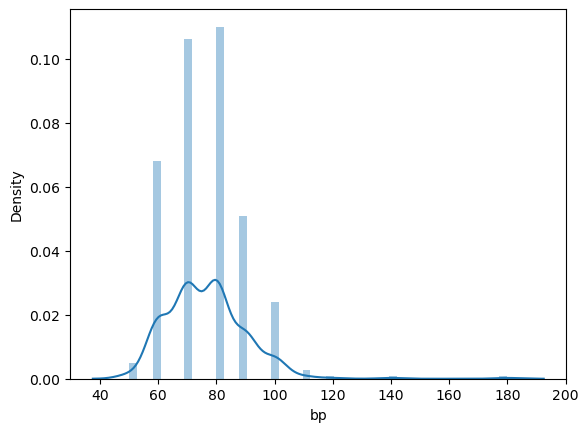

In [ ]:
sns.distplot(user_health_data['bp'])

In [ ]:
user_health_data.loc[user_health_data['bp'].isnull(), 'bp']=80

In [ ]:
#Analysis of sg column
user_health_data['sg'].describe()

count    353.000000
mean       1.017408
std        0.005717
min        1.005000
25%        1.010000
50%        1.020000
75%        1.020000
max        1.025000
Name: sg, dtype: float64

In [ ]:
user_health_data['sg'].value_counts()

1.020    106
1.010     84
1.025     81
1.015     75
1.005      7
Name: sg, dtype: int64

In [ ]:
user_health_data.loc[user_health_data['sg'].isnull(),:]

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
1,47.0,80.0,NaN,NaN,NaN,NaN,NaN,notpresent,notpresent,93.0,...,52,8100,5.2,no,no,no,good,no,no,notckd
35,55.0,70.0,NaN,NaN,NaN,NaN,NaN,notpresent,notpresent,93.0,...,NaN,NaN,NaN,yes,yes,no,good,no,no,ckd
41,76.0,90.0,NaN,NaN,NaN,NaN,NaN,notpresent,notpresent,172.0,...,30,NaN,NaN,yes,yes,no,good,no,yes,ckd
46,74.0,60.0,NaN,NaN,NaN,NaN,NaN,notpresent,notpresent,108.0,...,NaN,NaN,NaN,yes,yes,no,good,no,no,ckd
60,55.0,90.0,NaN,NaN,NaN,NaN,NaN,notpresent,notpresent,207.0,...,NaN,NaN,NaN,yes,yes,no,good,no,yes,ckd
61,38.0,70.0,NaN,NaN,NaN,NaN,NaN,notpresent,notpresent,104.0,...,NaN,NaN,NaN,yes,no,no,poor,yes,no,ckd
76,67.0,80.0,NaN,NaN,NaN,NaN,NaN,notpresent,notpresent,341.0,...,41,6900,4.9,yes,yes,no,good,no,yes,ckd
90,72.0,90.0,NaN,NaN,NaN,NaN,NaN,notpresent,notpresent,84.0,...,NaN,NaN,NaN,no,yes,no,good,no,no,ckd
92,78.0,60.0,NaN,NaN,NaN,NaN,NaN,notpresent,notpresent,114.0,...,24,NaN,NaN,no,yes,no,good,no,yes,ckd
94,54.0,70.0,NaN,NaN,NaN,NaN,NaN,notpresent,notpresent,111.0,...,35,8600,4.6,no,no,no,good,no,no,ckd


In [ ]:
##Analysis of htn column

In [ ]:
user_health_data['htn'].value_counts()
user_health_data.loc[user_health_data['htn'].isnull(),'htn']='no'

In [ ]:
user_health_data['dm'].value_counts()
user_health_data.loc[user_health_data['dm'].isnull(),'dm']='no'

In [ ]:
user_health_data['cad'].value_counts()
user_health_data.loc[user_health_data['cad'].isnull(), 'cad']='no'

In [ ]:
user_health_data['appet'].value_counts()
user_health_data.loc[user_health_data['appet'].isnull(), 'appet']='poor'

In [ ]:
user_health_data['pe'].value_counts()
user_health_data.loc[user_health_data['pe'].isnull(), 'pe']='no'

In [ ]:
user_health_data['ane'].value_counts()
user_health_data.loc[user_health_data['ane'].isnull(), 'ane']='no'

In [ ]:
#Analysis of pcc columns

user_health_data.loc[user_health_data['pcc'].isnull(),:]

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
192,54.0,70.0,1.02,0.0,0.0,NaN,NaN,NaN,NaN,76.0,...,52,8400,5.9,no,no,no,good,no,no,notckd
282,35.0,80.0,1.02,0.0,0.0,normal,normal,NaN,NaN,99.0,...,48,5000,5.2,no,no,no,good,no,no,notckd
315,28.0,70.0,1.02,0.0,0.0,normal,normal,NaN,NaN,131.0,...,45,8600,6.5,no,no,no,good,no,no,notckd
333,45.0,60.0,1.02,0.0,0.0,normal,normal,NaN,NaN,114.0,...,43,9200,5.8,no,no,no,good,no,no,notckd


In [ ]:
pd.crosstab(user_health_data['pc'],user_health_data['pcc'])

pcc,notpresent,present
pc,,
abnormal,43,33
normal,248,8


In [ ]:
user_health_data['pcc'].fillna(value='notpresent',inplace=True)

In [ ]:
user_health_data['ba'].value_counts()
user_health_data['ba'].fillna(value='notpresent',inplace=True)

In [ ]:
##Analysis of bu column
user_health_data['bu'].describe()

count    381.000000
mean      57.425722
std       50.503006
min        1.500000
25%       27.000000
50%       42.000000
75%       66.000000
max      391.000000
Name: bu, dtype: float64

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='bu', ylabel='Density'>

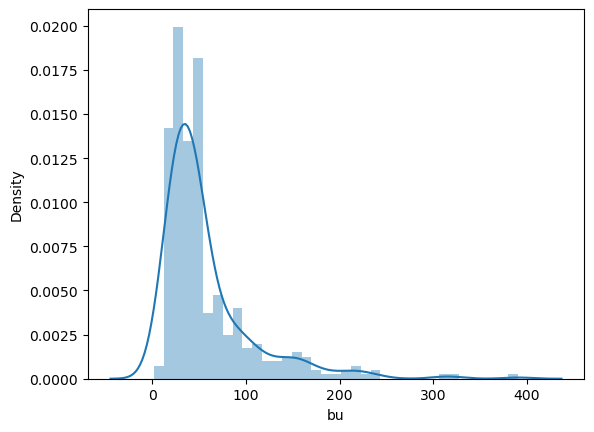

In [ ]:
sns.distplot(user_health_data['bu'])

In [ ]:
user_health_data.corr()

,age,bp,sg,al,su,bgr,bu,sc,sod,pot,hemo
age,1.000000,0.138145,-0.192300,0.123150,0.219392,0.243656,0.196406,0.132612,-0.100263,0.057955,-0.188472
bp,0.138145,1.000000,-0.220514,0.160641,0.218112,0.156429,0.185525,0.144898,-0.114973,0.072974,-0.306575
sg,-0.192300,-0.220514,1.000000,-0.469760,-0.296234,-0.374710,-0.314295,-0.361473,0.412190,-0.072787,0.599750
al,0.123150,0.160641,-0.469760,1.000000,0.269305,0.379464,0.453528,0.399198,-0.459896,0.129038,-0.631662
su,0.219392,0.218112,-0.296234,0.269305,1.000000,0.717827,0.168583,0.223244,-0.131776,0.219450,-0.218190
bgr,0.243656,0.156429,-0.374710,0.379464,0.717827,1.000000,0.143322,0.114875,-0.267848,0.066966,-0.312773
bu,0.196406,0.185525,-0.314295,0.453528,0.168583,0.143322,1.000000,0.586368,-0.323054,0.357049,-0.611413
sc,0.132612,0.144898,-0.361473,0.399198,0.223244,0.114875,0.586368,1.000000,-0.690158,0.326107,-0.403606
sod,-0.100263,-0.114973,0.412190,-0.459896,-0.131776,-0.267848,-0.323054,-0.690158,1.000000,0.097887,0.363104
pot,0.057955,0.072974,-0.072787,0.129038,0.219450,0.066966,0.357049,0.326107,0.097887,1.000000,-0.129260


In [ ]:
user_health_data.loc[user_health_data['bu'].isnull(),'bu']= 42

In [ ]:
##Analysis of sc column

user_health_data['sc'].describe()

count    383.000000
mean       3.072454
std        5.741126
min        0.400000
25%        0.900000
50%        1.300000
75%        2.800000
max       76.000000
Name: sc, dtype: float64

In [ ]:
##Analysis of bgr column

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='bgr', ylabel='Density'>

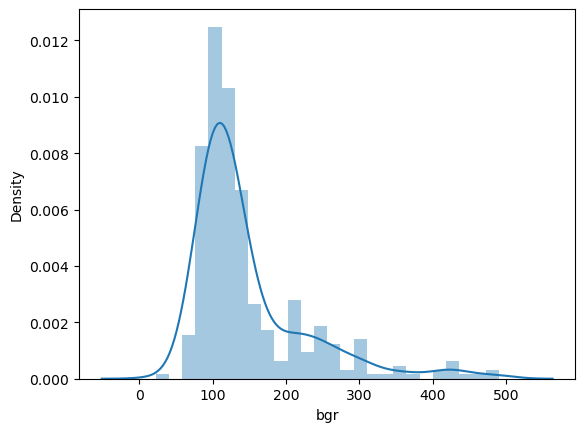

In [ ]:
sns.distplot(user_health_data['bgr'])

In [ ]:
user_health_data['bgr'].describe()

count    356.000000
mean     148.036517
std       79.281714
min       22.000000
25%       99.000000
50%      121.000000
75%      163.000000
max      490.000000
Name: bgr, dtype: float64

In [ ]:
user_health_data['bgr'].isnull().sum()

44

<AxesSubplot:xlabel='dm', ylabel='bgr'>

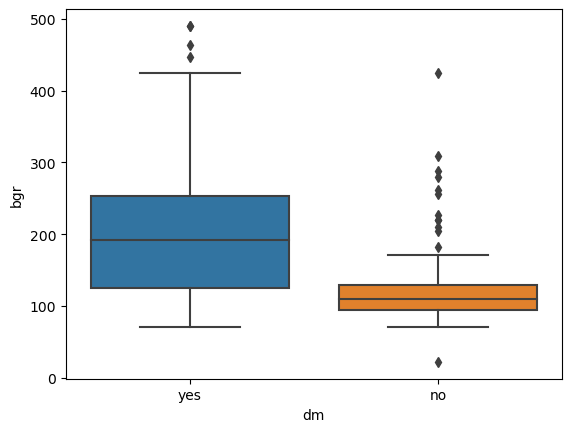

In [ ]:
sns.boxplot(x=user_health_data['dm'], y=user_health_data['bgr'])

In [ ]:
print(user_health_data.loc[user_health_data['dm']== 'no', 'bgr'].median())
print(user_health_data.loc[user_health_data['dm']== 'yes', 'bgr'].median())

109.0
192.0


In [ ]:
user_health_data.loc[(user_health_data['bgr'].isnull()) & (user_health_data['dm']=='no'), 'bgr']= 109
user_health_data.loc[(user_health_data['bgr'].isnull()) & (user_health_data['dm']=='yes'), 'bgr']= 192

In [ ]:
#Analysis of sc column
user_health_data['sc'].describe()

count    383.000000
mean       3.072454
std        5.741126
min        0.400000
25%        0.900000
50%        1.300000
75%        2.800000
max       76.000000
Name: sc, dtype: float64

<AxesSubplot:xlabel='pc', ylabel='sc'>

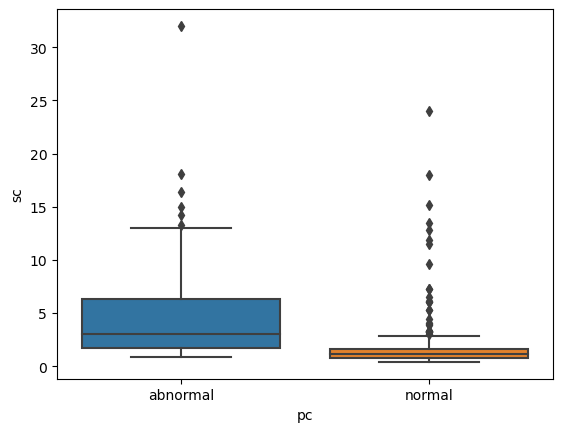

In [ ]:
sns.boxplot(x = user_health_data['pc'], y = user_health_data['sc'])

In [ ]:
print(user_health_data.loc[user_health_data['pc']=='normal', 'sc'].median())
print(user_health_data.loc[user_health_data['pc']=='abnormal', 'sc'].median())

1.1
3.0


In [ ]:
user_health_data.loc[(user_health_data['sc'].isnull()) & (user_health_data['pc']=='normal'), 'sc'] = 1
user_health_data.loc[(user_health_data['sc'].isnull()) & (user_health_data['pc']=='abnormal'), 'sc'] = 3
user_health_data['sc'].fillna(value=user_health_data['sc'].median(), inplace=True)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='al', ylabel='Density'>

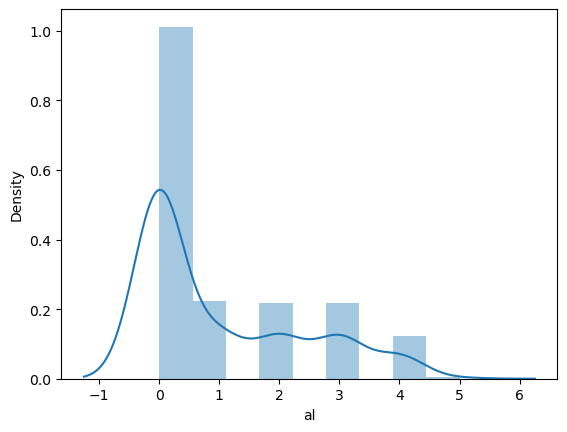

In [ ]:
#Analyis of al column
sns.distplot(user_health_data['al'])

In [ ]:
user_health_data['al'].value_counts()

0.0    199
1.0     44
3.0     43
2.0     43
4.0     24
5.0      1
Name: al, dtype: int64

In [ ]:
user_health_data['al'].fillna(value = 0.0, inplace=True)

In [ ]:
#Analysis of sg column
user_health_data['sg'].value_counts()

1.020    106
1.010     84
1.025     81
1.015     75
1.005      7
Name: sg, dtype: int64

In [ ]:
user_health_data['sg'].fillna(value= 1.020, inplace=True)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='hemo', ylabel='Density'>

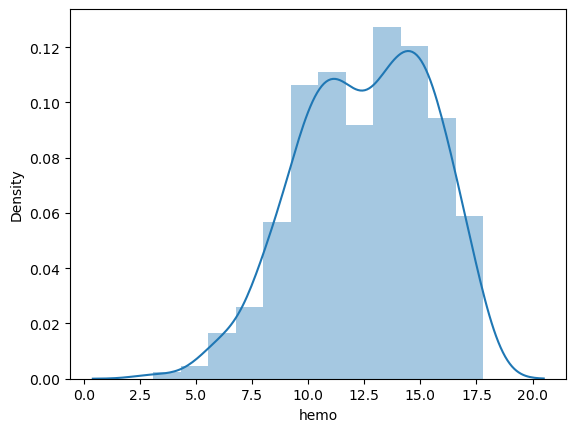

In [ ]:
#Analysis of hemo column
sns.distplot(user_health_data['hemo'])

<AxesSubplot:xlabel='htn', ylabel='hemo'>

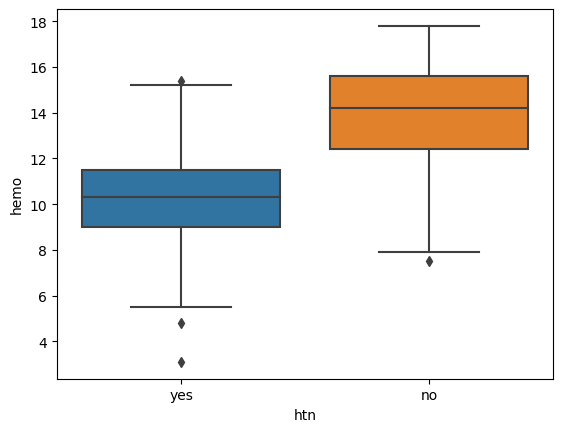

In [ ]:
sns.boxplot(x=user_health_data['htn'], y=user_health_data['hemo'])

In [ ]:
print(user_health_data.loc[user_health_data['htn']== 'no', 'hemo'].median())
print(user_health_data.loc[user_health_data['htn']== 'yes', 'hemo'].median())

14.2
10.3


In [ ]:
user_health_data.loc[(user_health_data['hemo'].isnull()) & (user_health_data['htn']=='no'), 'hemo']= 14.2
user_health_data.loc[(user_health_data['hemo'].isnull()) & (user_health_data['htn']=='yes'), 'hemo']= 10.3

In [ ]:
#Analysis of su column

In [ ]:
user_health_data['su'].fillna(value= 0.0, inplace= True)

In [ ]:
#Drop columns where missing percentage is more than zero (no permanent)

In [ ]:
user_health_data.dropna(axis=1, inplace= True)

In [ ]:
user_health_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             400 non-null    float64
 1   bp              400 non-null    float64
 2   sg              400 non-null    float64
 3   al              400 non-null    float64
 4   su              400 non-null    float64
 5   pcc             400 non-null    object 
 6   ba              400 non-null    object 
 7   bgr             400 non-null    float64
 8   bu              400 non-null    float64
 9   sc              400 non-null    float64
 10  hemo            400 non-null    float64
 11  htn             400 non-null    object 
 12  dm              400 non-null    object 
 13  cad             400 non-null    object 
 14  appet           400 non-null    object 
 15  pe              400 non-null    object 
 16  ane             400 non-null    object 
 17  classification  400 non-null    obj

In [ ]:
train_features= user_health_data.drop(['classification'], axis=1)
train_targets= user_health_data['classification']

In [ ]:
obj_cols = user_health_data.select_dtypes('object')
obj_cols.drop('classification', axis=1, inplace=True)

obj_column_names = obj_cols.columns

In [ ]:
obj_cols

,pcc,ba,htn,dm,cad,appet,pe,ane
0,present,present,yes,yes,yes,good,no,no
1,notpresent,notpresent,no,no,no,good,no,no
2,notpresent,notpresent,no,no,no,good,no,no
3,notpresent,notpresent,no,no,no,good,no,no
4,notpresent,notpresent,no,yes,no,good,no,no
...,...,...,...,...,...,...,...,...
395,present,notpresent,yes,no,no,good,no,no
396,notpresent,notpresent,no,no,no,good,no,yes
397,notpresent,notpresent,no,no,no,good,no,no
398,notpresent,notpresent,no,no,no,good,no,no


In [ ]:
obj_column_names

Index(['pcc', 'ba', 'htn', 'dm', 'cad', 'appet', 'pe', 'ane'], dtype='object')

In [ ]:
ohe = OneHotEncoder()

ohe.fit(obj_cols)

new_cols = ohe.get_feature_names_out(obj_column_names)

transformed_cols = ohe.transform(obj_cols).toarray()

transformed_cols = pd.DataFrame(transformed_cols, columns= new_cols)

user_health_data.drop( obj_column_names, axis=1, inplace= True)



In [ ]:
user_health_data = pd.concat([user_health_data, transformed_cols], axis=1)

In [ ]:
user_health_data

,age,bp,sg,al,su,bgr,bu,sc,hemo,classification,...,dm_no,dm_yes,cad_no,cad_yes,appet_good,appet_poor,pe_no,pe_yes,ane_no,ane_yes
0,71.0,70.0,1.010,3.0,0.0,219.0,82.0,3.6,10.4,1,...,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0
1,47.0,80.0,1.020,0.0,0.0,93.0,33.0,0.9,13.3,0,...,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
2,58.0,80.0,1.025,0.0,0.0,131.0,18.0,1.1,15.8,0,...,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
3,60.0,90.0,1.010,2.0,0.0,105.0,53.0,2.3,11.1,1,...,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
4,26.0,70.0,1.015,0.0,4.0,250.0,20.0,1.1,15.6,1,...,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,67.0,90.0,1.020,1.0,0.0,141.0,66.0,3.2,10.3,1,...,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
396,47.0,80.0,1.010,0.0,0.0,109.0,28.0,0.9,12.4,1,...,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
397,55.0,80.0,1.020,0.0,0.0,118.0,18.0,0.9,15.5,0,...,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
398,69.0,70.0,1.010,0.0,4.0,256.0,40.0,1.2,14.2,1,...,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0


In [ ]:
numeric_classification = []

for elem in user_health_data['classification']:
    if elem == 'ckd':
        numeric_classification.append(1)
    else:
        numeric_classification.append(0)

user_health_data['classification'] = numeric_classification

In [ ]:
user_health_data['classification'].value_counts()

1    250
0    150
Name: classification, dtype: int64

In [ ]:
#creating training features and targets

train_features= user_health_data.drop(['classification'], axis=1)
train_targets= user_health_data['classification']

In [ ]:
#Lets start modelling

In [ ]:
#Decision Tree using grid search cv

In [ ]:
params_dict = {'max_depth': [3,4,5],
              'criterion': ['gini'],
              'min_samples_split':[5,10,15,20],
          'class_weight':[{1: 1, 0: 1}, 'balanced', {1:0.8, 0: 1.2}, {1:1, 0:2}]}

clf = DecisionTreeClassifier()

grid_search = GridSearchCV(estimator = clf,
                           param_grid = params_dict,
                           cv = 5,
                           scoring = 'f1',
                           return_train_score=True)

grid_search.fit(train_features, train_targets)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'class_weight': [{0: 1, 1: 1}, 'balanced',
                                          {0: 1.2, 1: 0.8}, {0: 2, 1: 1}],
                         'criterion': ['gini'], 'max_depth': [3, 4, 5],
                         'min_samples_split': [5, 10, 15, 20]},
             return_train_score=True, scoring='f1')

In [ ]:
###Analyze the result

results = pd.DataFrame({'Params': grid_search.cv_results_['params'],
                        'TrainF1': grid_search.cv_results_['mean_train_score'],
                        'ValF1': grid_search.cv_results_['mean_test_score']})

results.to_csv('DecisionTreeResults.csv', index=None)

In [ ]:
###Fit the model with best combination

clf = DecisionTreeClassifier(class_weight={1: 1, 0: 1},
                              criterion='gini',
                              max_depth=4,
                              min_samples_split=10)

clf.fit(train_features, train_targets)

with open('decisiontreemodel.pickle', 'wb') as f:
    pickle.dump(clf,f)

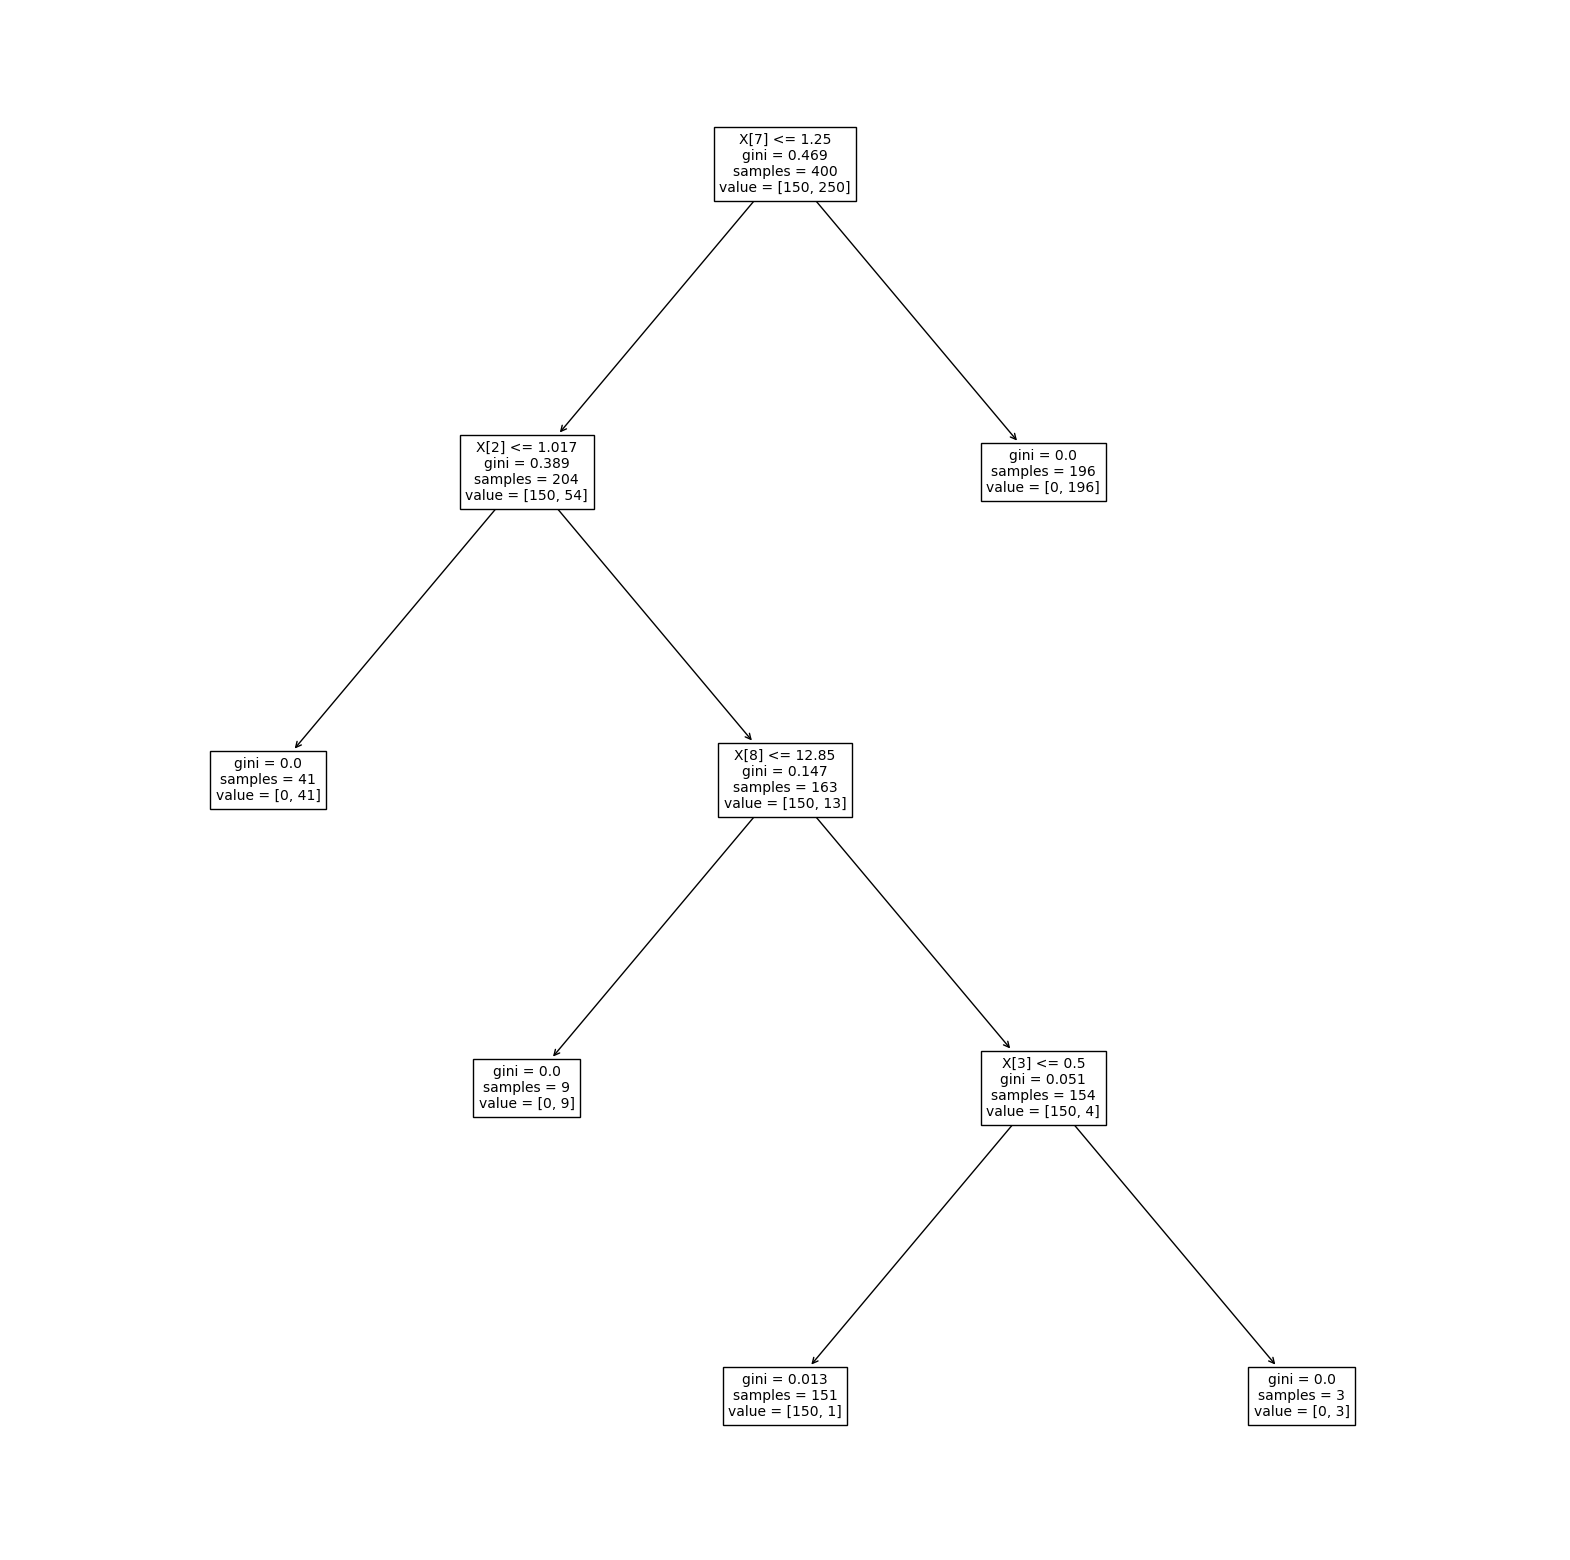

In [ ]:
from sklearn.tree import plot_tree
plot_rows =1
plot_cols = 1

fig, ax1 = plt.subplots(nrows = plot_rows,ncols=plot_cols,figsize = (20,20))

plot_tree(clf, ax=ax1, fontsize=10)
plt.show()

In [ ]:
dict(zip(train_features.columns,list(clf.feature_importances_)))

{'age': 0.0,
 'bp': 0.0,
 'sg': 0.29909122838038066,
 'al': 0.03129400719762167,
 'su': 0.0,
 'bgr': 0.0,
 'bu': 0.0,
 'sc': 0.5826443027010001,
 'hemo': 0.08697046172099757,
 'pcc_notpresent': 0.0,
 'pcc_present': 0.0,
 'ba_notpresent': 0.0,
 'ba_present': 0.0,
 'htn_no': 0.0,
 'htn_yes': 0.0,
 'dm_no': 0.0,
 'dm_yes': 0.0,
 'cad_no': 0.0,
 'cad_yes': 0.0,
 'appet_good': 0.0,
 'appet_poor': 0.0,
 'pe_no': 0.0,
 'pe_yes': 0.0,
 'ane_no': 0.0,
 'ane_yes': 0.0}